In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('place.csv')
df.sample(3)

,marks,experience,placed
47,71,5,1
58,59,21,1
226,10,28,0


In [3]:
df.shape

(230, 3)

In [4]:
df.isnull().sum()

marks         0
experience    0
placed        0
dtype: int64

In [5]:
df['placed'].value_counts()# this data is imbalanced

placed
1    131
0     99
Name: count, dtype: int64

In [6]:
#split x and y
x = df.drop(columns='placed')
y = df['placed']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [8]:
df.describe()

,marks,experience,placed
count,230.000000,230.000000,230.000000
mean,44.060870,14.769565,0.569565
std,29.057926,8.794795,0.496217
min,1.000000,1.000000,0.000000
25%,19.250000,7.000000,0.000000
50%,39.000000,15.000000,1.000000
75%,67.000000,23.000000,1.000000
max,100.000000,30.000000,1.000000


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred_train= lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(roc_auc_score(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

0.9557692307692308
[[19  1]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        26

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



In [14]:
from mlxtend.plotting import plot_decision_regions

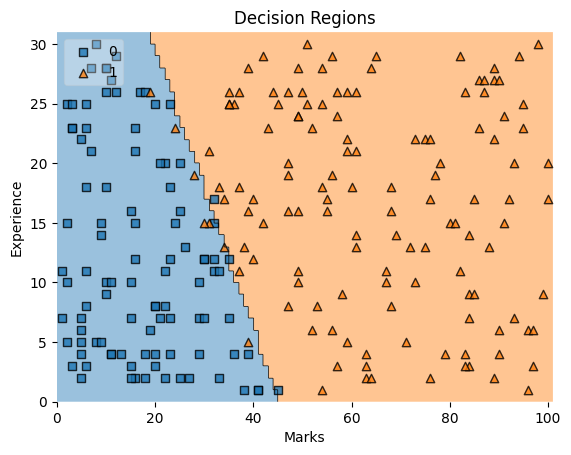

In [15]:
plot_decision_regions(x.values, y.values, clf=lr, legend=2)
plt.xlabel('Marks')
plt.ylabel('Experience')
plt.title('Decision Regions')
plt.show()

<Axes: >

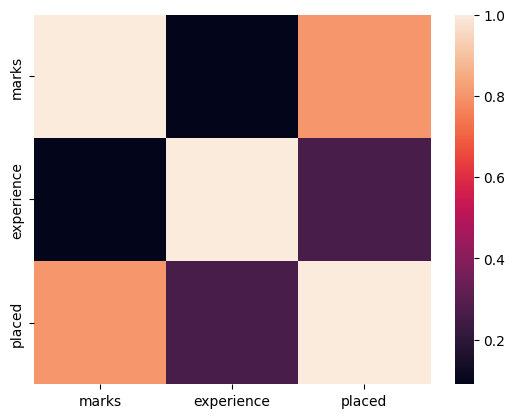

In [16]:
sns.heatmap(df.corr(numeric_only=True))

### Performance of Classification Models

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
print('Training data classification report\n',classification_report(y_train,y_pred_train),'\n')

Training data classification report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        79
           1       0.97      0.95      0.96       105

    accuracy                           0.96       184
   macro avg       0.95      0.96      0.96       184
weighted avg       0.96      0.96      0.96       184
 



In [19]:
print('Test data classification report\n',classification_report(y_test, y_pred_test),'\n')

Test data classification report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        26

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46
 



In [20]:
print(f'{accuracy_score(y_test, y_pred_test):.2f}')

0.96


In [21]:
print(confusion_matrix(y_test, y_pred_test))

[[19  1]
 [ 1 25]]


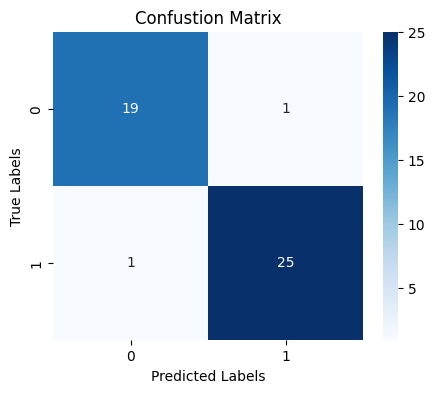

In [22]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confustion Matrix')
plt.show()

In [24]:
# Compute ROC and AUC
y_prob=lr.predict_proba(X_train)[:,1]
y_prob
# below is the output of sigmoid function

array([9.99999976e-01, 1.00000000e+00, 8.32624243e-08, 9.94120672e-01,
       5.60182489e-09, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.10781411e-02, 8.74598417e-06, 6.07689401e-01, 1.09447339e-07,
       1.00000000e+00, 1.35537458e-03, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.28606962e-06, 3.73334521e-04,
       9.99617810e-01, 1.29979718e-04, 9.99999956e-01, 9.99997118e-01,
       3.38480386e-08, 9.97598095e-01, 2.41787513e-05, 9.99902586e-01,
       1.00000000e+00, 3.58740952e-04, 9.99999997e-01, 3.94051911e-09,
       1.38441077e-07, 9.99999238e-01, 9.99999994e-01, 1.00000000e+00,
       4.98440373e-09, 9.82624867e-01, 3.12977836e-08, 1.00000000e+00,
       2.74978225e-01, 1.57268419e-05, 3.00814794e-02, 8.07536037e-06,
       1.08647871e-01, 1.00000000e+00, 9.99987734e-01, 1.02145857e-05,
       1.27416352e-08, 1.17816263e-08, 4.81937485e-01, 9.99999294e-01,
       7.53657601e-03, 1.00000000e+00, 9.99433857e-01, 3.43720577e-05,
      

In [27]:
threshold = 0.5
y_pred_r = (y_prob>threshold).astype(int)
print('Threshold: ', threshold)
y_pred_r
# below is the predicted values converted from the sigmoid function values using a threshold

Threshold:  0.5


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [32]:
from sklearn.metrics import roc_curve, auc

y_probs_test = lr.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_probs_test)

In [33]:
fpr

array([0.  , 0.  , 0.  , 0.05, 0.05, 0.1 , 0.2 , 1.  ])

In [34]:
tpr

array([0.        , 0.03846154, 0.96153846, 0.96153846, 1.        ,
       1.        , 1.        , 1.        ])

In [35]:
threshold

array([           inf, 1.00000000e+00, 7.35827087e-01, 6.88010384e-01,
       3.95545287e-01, 2.67097546e-01, 2.23921878e-01, 2.77189865e-09])

In [37]:
roc_auc = auc(fpr,tpr)
roc_auc

np.float64(0.9980769230769231)

In [40]:
# find optimal value of threshold
optimal_idx = np.argmax(tpr-fpr)
print(optimal_idx)

2


In [41]:
 35:34

SyntaxError: illegal target for annotation (1495812918.py, line 1)